# This is a test of the librosa library in converting a single mp3 spectrograms

In [16]:
import numpy as np
import pandas as pd
import librosa
import matplotlib.pyplot as plt
import os

In [17]:
librosa.__version__

'0.10.0.post2'

In [18]:
def get_melspectrogram(wav_file_path):
  y, sr = librosa.load(wav_file_path, offset=10, duration=240)
  melspectrogram = np.array(librosa.feature.melspectrogram(y=y, sr=sr))
  return melspectrogram

def get_chroma_vector(wav_file_path):
  y, sr = librosa.load(wav_file_path)
  chroma = np.array(librosa.feature.chroma_stft(y=y, sr=sr))
  return chroma

def get_tonnetz(wav_file_path):
  y, sr = librosa.load(wav_file_path)
  tonnetz = np.array(librosa.feature.tonnetz(y=y, sr=sr))
  return tonnetz

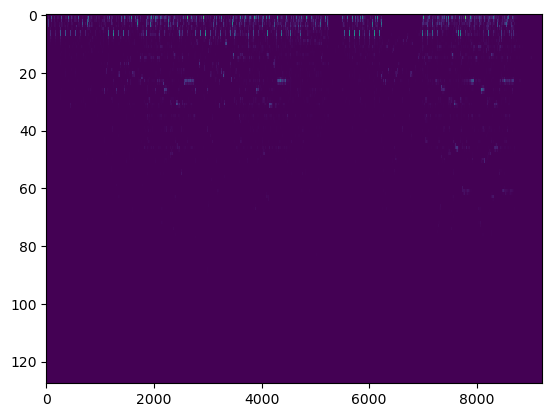

In [23]:
# %%timeit
melspectrogram = get_melspectrogram('/Users/vii/repos/brainstation_capstone/data/mp3s/1ZB2qWsheGabSEYvBYxjKn/Take on Me/Weezer - Take on Me.mp3')
plt.imshow(melspectrogram, interpolation='nearest', aspect='auto')
plt.show()

The conversion to a melspectrogram is quite fast! File size is about 10-15 mb per song.

In [24]:
melspectrogram.shape

(128, 9218)

In [25]:
# pd.DataFrame(melspectrogram).to_csv('test_audio.csv', index=False)
df = pd.DataFrame(melspectrogram)
df.columns = df.columns.astype(str)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128 entries, 0 to 127
Columns: 9218 entries, 0 to 9217
dtypes: float32(9218)
memory usage: 4.5 MB


In [26]:
# df.to_parquet('../data/test_audio.parquet')

### Testing Other Features

In [27]:
example_file = '/Users/vii/repos/brainstation_capstone/data/mp3s/1ZB2qWsheGabSEYvBYxjKn/Take on Me/Weezer - Take on Me.mp3'

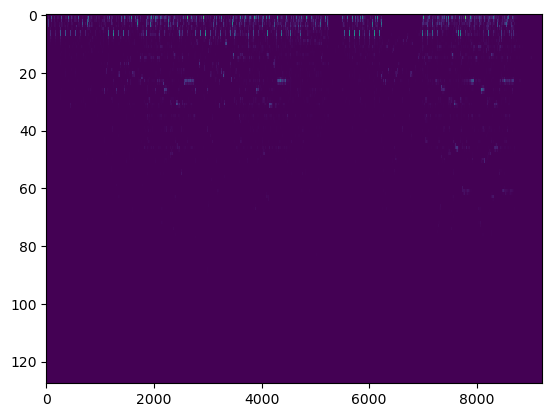

In [28]:
# Loudness Profile?
# https://medium.com/analytics-vidhya/understanding-the-mel-spectrogram-fca2afa2ce53
# https://librosa.org/doc/latest/generated/librosa.feature.melspectrogram.html
melspectrogram = get_melspectrogram(example_file)
plt.imshow(melspectrogram, interpolation='nearest', aspect='auto')
plt.show()

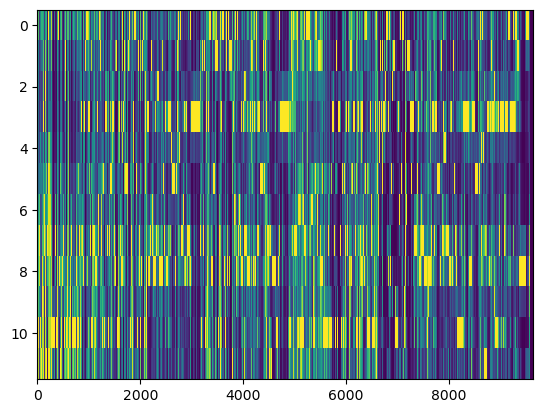

In [29]:
# Pitch-class profile
# https://en.wikipedia.org/wiki/Chroma_feature
# https://librosa.org/doc/latest/generated/librosa.feature.chroma_stft.html
chroma = get_chroma_vector(example_file)
plt.imshow(chroma, interpolation='nearest', aspect='auto')
plt.show()

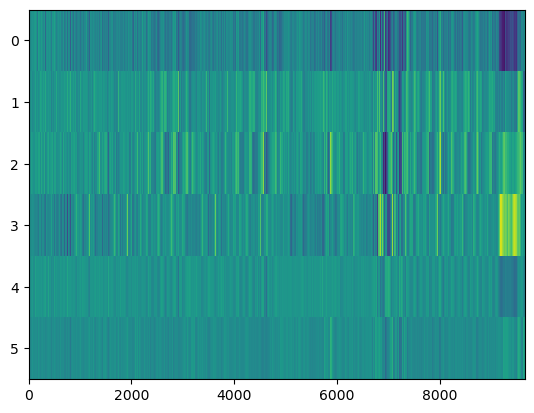

In [30]:
# Harmonic Relationships (Tonnetz)
# https://en.wikipedia.org/wiki/Tonnetz
# https://librosa.org/doc/latest/generated/librosa.feature.tonnetz.html
tntz = get_tonnetz(example_file)
plt.imshow(tntz , interpolation='nearest', aspect='auto')
plt.show()

In [31]:
example_file = '/Users/vii/repos/brainstation_capstone/data/mp3s/1cjvpB46mcjPIt9KFktKwk/Rigoletto  Act 2 Cortigiani, vil razza dannata...Ebben piango/Giuseppe Verdi, Sherrill Milnes, London Symphony Orchestra, Richard Bonynge - #Rigoletto # Act 2# ##Cortigiani, vil razza dannata...Ebben piango###.mp3'

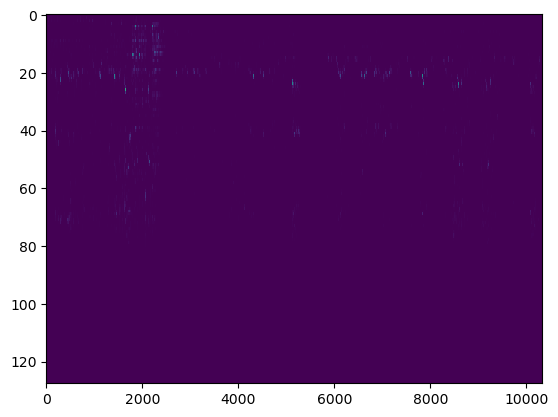

In [32]:
melspectrogram = get_melspectrogram(example_file)
plt.imshow(melspectrogram, interpolation='nearest', aspect='auto')
plt.show()

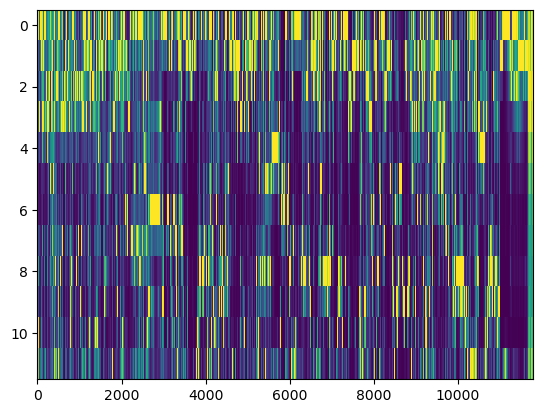

In [33]:
chroma = get_chroma_vector(example_file)
plt.imshow(chroma, interpolation='nearest', aspect='auto')
plt.show()

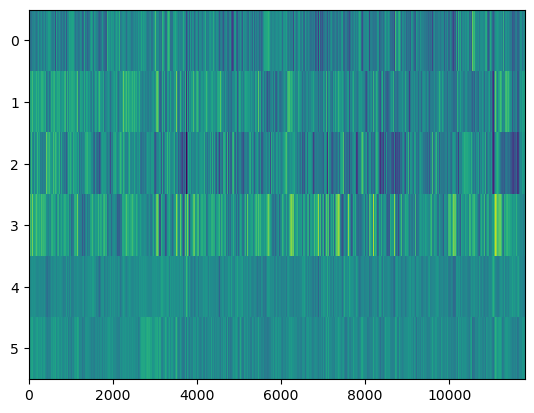

In [34]:
tntz = get_tonnetz(example_file)
plt.imshow(tntz , interpolation='nearest', aspect='auto')
plt.show()